## Breast cancer prediction model

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
#reading the csv data file
df =  pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Exploration

In [3]:
#(columns, rows)
df.shape


(569, 33)

In [4]:
# first row
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:

#info about data (serial number  column name non-null-count data-type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#after checking the data remove null row
df = df.drop(['Unnamed: 32'],axis=1)

In [7]:
#again checking rows and columns
df.shape

(569, 32)

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#finding co-relation between data parameters
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


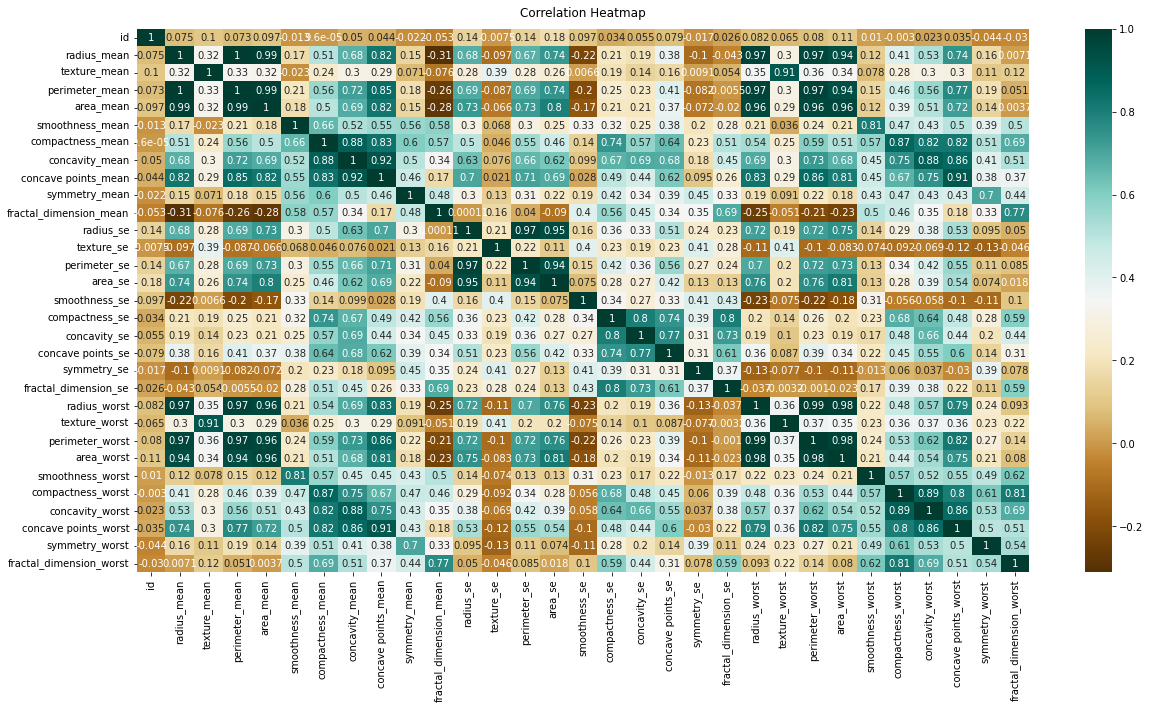

In [10]:
# PLOTTING HEATMAP FOR VISUALISING CORRELATION BETWEEN FEATURES
plt.figure(figsize=(20, 10))
heatmap = sb.heatmap(df.corr(),cmap='BrBG',annot=True)
# Give a title to the heatmap. Pad (distance of the title - heatmap ).
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='diagnosis'>

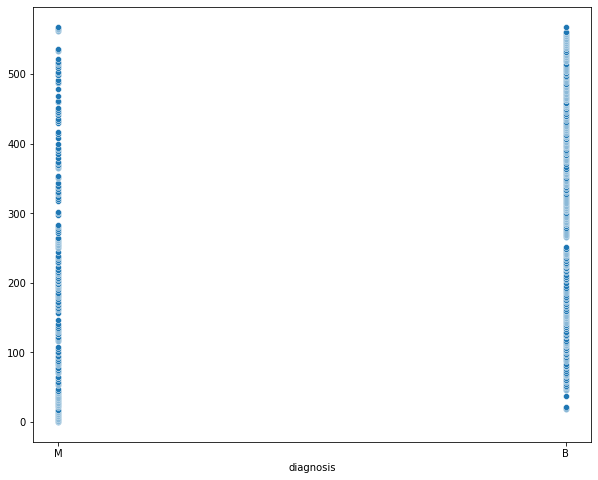

In [11]:
#check the balance in deendent feature
plt.figure(figsize=(10, 8))
sb.scatterplot(y = df.index , x= df.diagnosis,palette = 'BrBe')

<AxesSubplot:xlabel='concavity_mean', ylabel='Density'>

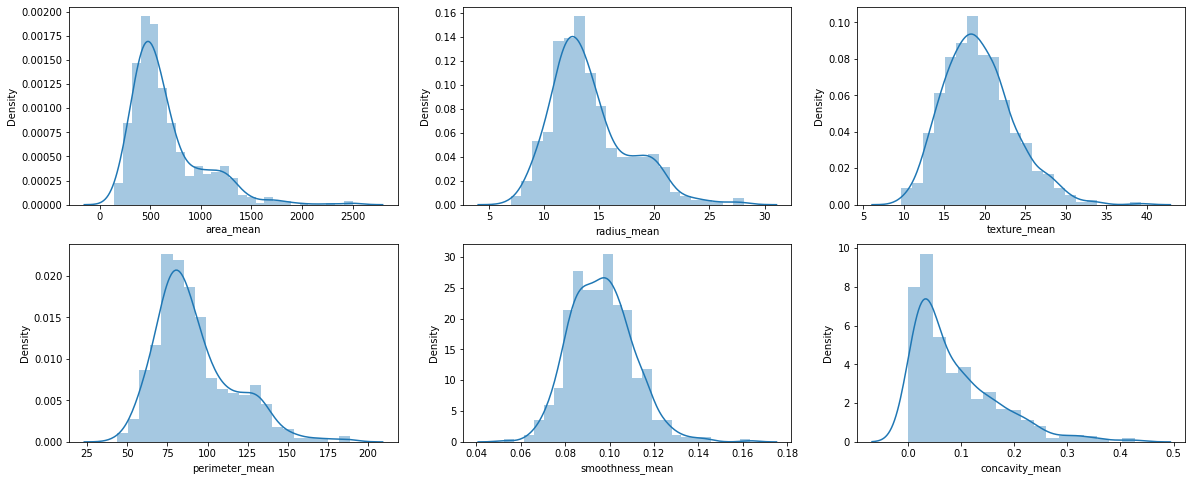

In [12]:
#DISTRIBUTION OF DATA IN FEATURES
fig, axes = plt.subplots(2,3,figsize=(20,8))
sb.distplot(df['area_mean'],ax = axes[0,0])
sb.distplot(df['radius_mean'],ax = axes[0,1])
sb.distplot(df['texture_mean'],ax = axes[0,2])
sb.distplot(df['perimeter_mean'],ax = axes[1,0])
sb.distplot(df['smoothness_mean'],ax = axes[1,1])
sb.distplot(df['concavity_mean'],ax = axes[1,2])

In [13]:
#CONVERTING CATEGORICAL DATA TO NUMERICAL
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [15]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

## Using PCA

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [18]:
scaled_data = scaler.transform(df)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [20]:
pca.fit(scaled_data)

PCA(n_components=2)

In [21]:
x_pca = pca.transform(scaled_data)

In [22]:
scaled_data.shape, x_pca.shape

((569, 32), (569, 2))

In [23]:
pca_df = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
pca_df

,principal component 1,principal component 2
0,9.216724,2.136750
1,2.651244,-3.770741
2,5.900697,-1.010916
3,7.137376,10.315636
4,4.139263,-1.916891
...,...,...
564,6.589934,-3.444874
565,4.020812,-3.546088
566,1.525754,-1.950552
567,10.395832,1.871229


## PCA visualization


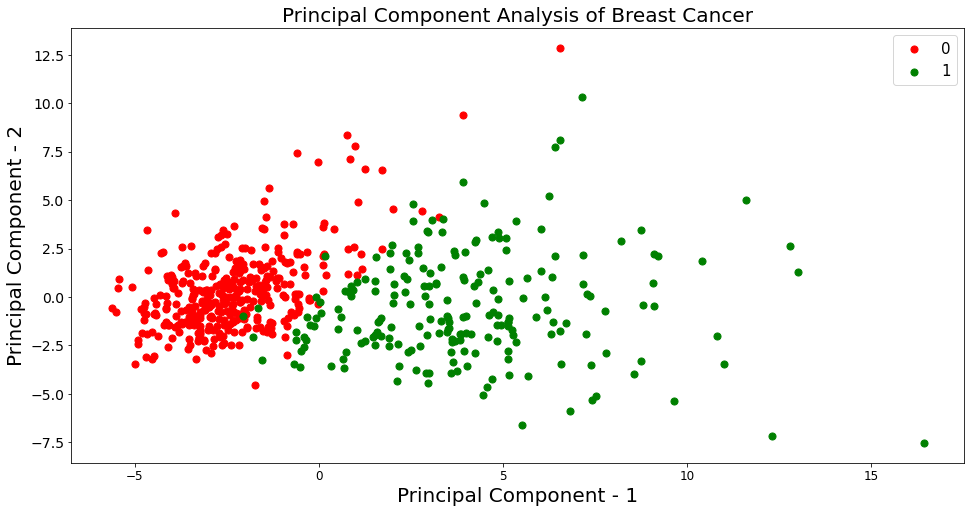

In [24]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['diagnosis'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## test and train data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']]
Y = df[['diagnosis']]

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)

In [28]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((398, 30), (398, 1), (171, 30), (171, 1))

## feature scaling

## 1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [30]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [31]:
Y_LR = LR.predict(X_test)

In [32]:
# printing accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
acc_LR = accuracy_score(Y_test, Y_LR)
print('ACCURACY SCORE: ',acc_LR)
cm_LR = confusion_matrix(Y_test,Y_LR)
print('CONFUSION MATRIX: \n',cm_LR)

ACCURACY SCORE:  0.9532163742690059
CONFUSION MATRIX: 
 [[102   6]
 [  2  61]]


## 2. KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#Finding best possible number of neighbors to choose value of n of best possible accuracy
no_of_neighbors_and_accuracies = {}
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    Y_knn = knn.predict(X_test)
    score = accuracy_score(Y_knn,Y_test)
    no_of_neighbors_and_accuracies[i] = score

In [35]:
no_of_neighbors_and_accuracies

{1: 0.9181286549707602,
 2: 0.9298245614035088,
 3: 0.9181286549707602,
 4: 0.9298245614035088,
 5: 0.9473684210526315,
 6: 0.9473684210526315,
 7: 0.9532163742690059,
 8: 0.9532163742690059,
 9: 0.9590643274853801,
 10: 0.9649122807017544,
 11: 0.9649122807017544,
 12: 0.9649122807017544,
 13: 0.9649122807017544,
 14: 0.9649122807017544}

In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
Y_knn = knn.predict(X_test)

In [38]:
acc_knn = accuracy_score(Y_test, Y_knn)
print('ACCURACY SCORE: ',acc_knn)
cm_knn = confusion_matrix(Y_test,Y_knn)
print('CONFUSION MATRIX: \n',cm_knn)

ACCURACY SCORE:  0.9181286549707602
CONFUSION MATRIX: 
 [[101   7]
 [  7  56]]


## 3. descision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')

In [40]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
Y_dtc = dtc.predict(X_test)

In [42]:
acc_dtc = accuracy_score(Y_test, Y_dtc)
print('ACCURACY SCORE: ',acc_dtc)
cm_dtc = confusion_matrix(Y_test,Y_dtc)
print('CONFUSION MATRIX: \n',cm_dtc)

ACCURACY SCORE:  0.9239766081871345
CONFUSION MATRIX: 
 [[99  9]
 [ 4 59]]


## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')

In [44]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [45]:
Y_rfc = rfc.predict(X_test)

In [46]:
acc_rfc = accuracy_score(Y_test, Y_rfc)
print('ACCURACY SCORE: ',acc_rfc)
cm_rfc = confusion_matrix(Y_test,Y_rfc)
print('CONFUSION MATRIX: \n',cm_rfc)

ACCURACY SCORE:  0.9707602339181286
CONFUSION MATRIX: 
 [[106   2]
 [  3  60]]


## SVM

In [47]:
from sklearn.svm import SVC
svc = SVC()

In [48]:
svc.fit(X_train,Y_train)

SVC()

In [49]:
Y_svc = svc.predict(X_test)

In [50]:
acc_svc = accuracy_score(Y_test, Y_svc)
print('ACCURACY SCORE: ',acc_svc)
cm_svc = confusion_matrix(Y_test,Y_svc)
print('CONFUSION MATRIX: \n',cm_svc)

ACCURACY SCORE:  0.9239766081871345
CONFUSION MATRIX: 
 [[107   1]
 [ 12  51]]


## Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB  
gnb = GaussianNB() 

In [52]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [53]:
Y_gnb = gnb.predict(X_test) 

In [54]:
acc_gnb = accuracy_score(Y_test, Y_gnb)
print('ACCURACY SCORE: ',acc_gnb)
cm_gnb = confusion_matrix(Y_test,Y_gnb)
print('CONFUSION MATRIX: \n',cm_gnb)

ACCURACY SCORE:  0.9239766081871345
CONFUSION MATRIX: 
 [[101   7]
 [  6  57]]


## Gradient Boosting


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [56]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [57]:
Y_gbc = gbc.predict(X_test)

In [58]:
acc_gbc = accuracy_score(Y_test, Y_gbc)
print('ACCURACY SCORE: ',acc_gbc)
cm_gbc = confusion_matrix(Y_test,Y_gbc)
print('CONFUSION MATRIX: \n',cm_gbc)

ACCURACY SCORE:  0.9707602339181286
CONFUSION MATRIX: 
 [[105   3]
 [  2  61]]


## Stochastic Gradient Decent

In [59]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

In [60]:
Y_sgdc = sgdc.fit(X_train,Y_train)

In [61]:
Y_sgdc = sgdc.predict(X_test)

In [62]:
acc_sgdc = accuracy_score(Y_test, Y_sgdc)
print('ACCURACY SCORE: ',acc_sgdc)
cm_sgdc = confusion_matrix(Y_test,Y_sgdc)
print('CONFUSION MATRIX: \n',cm_sgdc)

ACCURACY SCORE:  0.7426900584795322
CONFUSION MATRIX: 
 [[65 43]
 [ 1 62]]


## ADA Boost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

In [64]:
adb.fit(X_train,Y_train)

AdaBoostClassifier()

In [65]:
Y_adb = adb.predict(X_test)

In [66]:
acc_adb = accuracy_score(Y_test, Y_adb)
print('ACCURACY SCORE: ',acc_adb)
cm_adb = confusion_matrix(Y_test,Y_adb)
print('CONFUSION MATRIX: \n',cm_adb)

ACCURACY SCORE:  0.9649122807017544
CONFUSION MATRIX: 
 [[104   4]
 [  2  61]]


## XGBOOST

In [67]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [68]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
Y_xgb = xgb.predict(X_test)

In [70]:
acc_xgb = accuracy_score(Y_test, Y_xgb)
print('ACCURACY SCORE: ',acc_xgb)
cm_xgb = confusion_matrix(Y_test,Y_xgb)
print('CONFUSION MATRIX: \n',cm_xgb)

ACCURACY SCORE:  0.9649122807017544
CONFUSION MATRIX: 
 [[105   3]
 [  3  60]]


## catBoost

In [71]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()

In [72]:
cb.fit(X_train,Y_train)

Learning rate set to 0.006952
0:	learn: 0.6820687	total: 159ms	remaining: 2m 38s
1:	learn: 0.6709353	total: 163ms	remaining: 1m 21s
2:	learn: 0.6600661	total: 168ms	remaining: 55.8s
3:	learn: 0.6502544	total: 173ms	remaining: 43s
4:	learn: 0.6391503	total: 177ms	remaining: 35.2s
5:	learn: 0.6309270	total: 181ms	remaining: 30s
6:	learn: 0.6210186	total: 187ms	remaining: 26.5s
7:	learn: 0.6117659	total: 192ms	remaining: 23.8s
8:	learn: 0.6015440	total: 198ms	remaining: 21.8s
9:	learn: 0.5930425	total: 204ms	remaining: 20.2s
10:	learn: 0.5841518	total: 208ms	remaining: 18.7s
11:	learn: 0.5751108	total: 214ms	remaining: 17.6s
12:	learn: 0.5668866	total: 219ms	remaining: 16.6s
13:	learn: 0.5585284	total: 223ms	remaining: 15.7s
14:	learn: 0.5506487	total: 227ms	remaining: 14.9s
15:	learn: 0.5423643	total: 232ms	remaining: 14.3s
16:	learn: 0.5354333	total: 236ms	remaining: 13.7s
17:	learn: 0.5279502	total: 240ms	remaining: 13.1s
18:	learn: 0.5207870	total: 245ms	remaining: 12.6s
19:	learn: 0.

173:	learn: 0.1136471	total: 908ms	remaining: 4.31s
174:	learn: 0.1128770	total: 913ms	remaining: 4.3s
175:	learn: 0.1121877	total: 919ms	remaining: 4.3s
176:	learn: 0.1116903	total: 924ms	remaining: 4.29s
177:	learn: 0.1108475	total: 929ms	remaining: 4.29s
178:	learn: 0.1102398	total: 933ms	remaining: 4.28s
179:	learn: 0.1094073	total: 937ms	remaining: 4.27s
180:	learn: 0.1087555	total: 942ms	remaining: 4.26s
181:	learn: 0.1081060	total: 948ms	remaining: 4.26s
182:	learn: 0.1072326	total: 954ms	remaining: 4.26s
183:	learn: 0.1065244	total: 959ms	remaining: 4.25s
184:	learn: 0.1060281	total: 964ms	remaining: 4.25s
185:	learn: 0.1054471	total: 968ms	remaining: 4.24s
186:	learn: 0.1047237	total: 973ms	remaining: 4.23s
187:	learn: 0.1042059	total: 978ms	remaining: 4.22s
188:	learn: 0.1036205	total: 983ms	remaining: 4.22s
189:	learn: 0.1029335	total: 988ms	remaining: 4.21s
190:	learn: 0.1023338	total: 993ms	remaining: 4.21s
191:	learn: 0.1016751	total: 998ms	remaining: 4.2s
192:	learn: 0.1

346:	learn: 0.0504395	total: 1.65s	remaining: 3.11s
347:	learn: 0.0502092	total: 1.66s	remaining: 3.1s
348:	learn: 0.0499798	total: 1.66s	remaining: 3.1s
349:	learn: 0.0498325	total: 1.66s	remaining: 3.09s
350:	learn: 0.0496993	total: 1.67s	remaining: 3.08s
351:	learn: 0.0495330	total: 1.67s	remaining: 3.08s
352:	learn: 0.0493182	total: 1.68s	remaining: 3.07s
353:	learn: 0.0491811	total: 1.68s	remaining: 3.07s
354:	learn: 0.0489718	total: 1.69s	remaining: 3.06s
355:	learn: 0.0488267	total: 1.69s	remaining: 3.06s
356:	learn: 0.0486227	total: 1.69s	remaining: 3.05s
357:	learn: 0.0485097	total: 1.7s	remaining: 3.04s
358:	learn: 0.0483065	total: 1.7s	remaining: 3.04s
359:	learn: 0.0480771	total: 1.71s	remaining: 3.03s
360:	learn: 0.0478744	total: 1.71s	remaining: 3.02s
361:	learn: 0.0477503	total: 1.71s	remaining: 3.02s
362:	learn: 0.0476025	total: 1.72s	remaining: 3.01s
363:	learn: 0.0474466	total: 1.72s	remaining: 3.01s
364:	learn: 0.0472887	total: 1.73s	remaining: 3s
365:	learn: 0.04715

527:	learn: 0.0292943	total: 2.38s	remaining: 2.13s
528:	learn: 0.0292250	total: 2.39s	remaining: 2.13s
529:	learn: 0.0291141	total: 2.39s	remaining: 2.12s
530:	learn: 0.0290418	total: 2.4s	remaining: 2.12s
531:	learn: 0.0289377	total: 2.4s	remaining: 2.11s
532:	learn: 0.0288911	total: 2.41s	remaining: 2.11s
533:	learn: 0.0288251	total: 2.41s	remaining: 2.1s
534:	learn: 0.0287105	total: 2.41s	remaining: 2.1s
535:	learn: 0.0286499	total: 2.42s	remaining: 2.09s
536:	learn: 0.0285671	total: 2.42s	remaining: 2.09s
537:	learn: 0.0285039	total: 2.43s	remaining: 2.08s
538:	learn: 0.0284348	total: 2.43s	remaining: 2.08s
539:	learn: 0.0283447	total: 2.43s	remaining: 2.07s
540:	learn: 0.0282916	total: 2.44s	remaining: 2.07s
541:	learn: 0.0281776	total: 2.44s	remaining: 2.06s
542:	learn: 0.0281239	total: 2.45s	remaining: 2.06s
543:	learn: 0.0280792	total: 2.45s	remaining: 2.05s
544:	learn: 0.0280046	total: 2.45s	remaining: 2.05s
545:	learn: 0.0279493	total: 2.46s	remaining: 2.04s
546:	learn: 0.02

707:	learn: 0.0195598	total: 3.13s	remaining: 1.29s
708:	learn: 0.0195064	total: 3.13s	remaining: 1.29s
709:	learn: 0.0194603	total: 3.14s	remaining: 1.28s
710:	learn: 0.0194174	total: 3.14s	remaining: 1.28s
711:	learn: 0.0193791	total: 3.15s	remaining: 1.27s
712:	learn: 0.0193252	total: 3.15s	remaining: 1.27s
713:	learn: 0.0192810	total: 3.16s	remaining: 1.26s
714:	learn: 0.0192481	total: 3.16s	remaining: 1.26s
715:	learn: 0.0192157	total: 3.17s	remaining: 1.25s
716:	learn: 0.0191823	total: 3.17s	remaining: 1.25s
717:	learn: 0.0191517	total: 3.17s	remaining: 1.25s
718:	learn: 0.0191231	total: 3.18s	remaining: 1.24s
719:	learn: 0.0190624	total: 3.18s	remaining: 1.24s
720:	learn: 0.0190312	total: 3.19s	remaining: 1.23s
721:	learn: 0.0189931	total: 3.19s	remaining: 1.23s
722:	learn: 0.0189505	total: 3.19s	remaining: 1.22s
723:	learn: 0.0189246	total: 3.2s	remaining: 1.22s
724:	learn: 0.0188933	total: 3.2s	remaining: 1.22s
725:	learn: 0.0188455	total: 3.21s	remaining: 1.21s
726:	learn: 0.

886:	learn: 0.0138771	total: 3.88s	remaining: 494ms
887:	learn: 0.0138568	total: 3.88s	remaining: 489ms
888:	learn: 0.0138217	total: 3.88s	remaining: 485ms
889:	learn: 0.0137928	total: 3.89s	remaining: 481ms
890:	learn: 0.0137683	total: 3.89s	remaining: 476ms
891:	learn: 0.0137408	total: 3.9s	remaining: 472ms
892:	learn: 0.0137088	total: 3.9s	remaining: 467ms
893:	learn: 0.0136809	total: 3.9s	remaining: 463ms
894:	learn: 0.0136530	total: 3.91s	remaining: 459ms
895:	learn: 0.0136293	total: 3.91s	remaining: 454ms
896:	learn: 0.0136094	total: 3.92s	remaining: 450ms
897:	learn: 0.0135889	total: 3.92s	remaining: 445ms
898:	learn: 0.0135624	total: 3.92s	remaining: 441ms
899:	learn: 0.0135446	total: 3.93s	remaining: 437ms
900:	learn: 0.0135152	total: 3.93s	remaining: 432ms
901:	learn: 0.0134807	total: 3.94s	remaining: 428ms
902:	learn: 0.0134610	total: 3.94s	remaining: 423ms
903:	learn: 0.0134382	total: 3.94s	remaining: 419ms
904:	learn: 0.0134151	total: 3.95s	remaining: 415ms
905:	learn: 0.0

In [73]:
Y_cb = cb.predict(X_test)

In [74]:
acc_cb = accuracy_score(Y_test, Y_cb)
print('ACCURACY SCORE: ',acc_cb)
cm_cb = confusion_matrix(Y_test,Y_cb)
print('CONFUSION MATRIX: \n',cm_cb)


ACCURACY SCORE:  0.9649122807017544
CONFUSION MATRIX: 
 [[105   3]
 [  3  60]]


## Lightgbm

In [75]:
from lightgbm import LGBMClassifier

In [76]:
lg = LGBMClassifier()

In [77]:
lg.fit(X_train,Y_train)

LGBMClassifier()

In [78]:
Y_lg = lg.predict(X_test)

In [79]:
acc_lg = accuracy_score(Y_test, Y_lg)
print('ACCURACY SCORE: ',acc_lg)
cm_lg = confusion_matrix(Y_test,Y_lg)
print('CONFUSION MATRIX: \n',cm_lg)

ACCURACY SCORE:  0.9824561403508771
CONFUSION MATRIX: 
 [[108   0]
 [  3  60]]


## Result

In [80]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Decision Tree','Random Forest','Support Vector Machines',
              'Naive Bayes','Gradient Boosting','Stochastic gradient decent','AdaBoost','XGboost','Catboost','LightGBM'],
    'Score': [acc_LR, acc_knn, acc_dtc,acc_rfc, acc_svc, acc_gnb, acc_gbc, acc_sgdc, acc_adb, acc_xgb, acc_cb, acc_lg]})
models.sort_values(by='Score', ascending=False)

,Model,Score
11,LightGBM,0.982456
3,Random Forest,0.970760
6,Gradient Boosting,0.970760
8,AdaBoost,0.964912
9,XGboost,0.964912
10,Catboost,0.964912
0,Logistic Regression,0.953216
2,Decision Tree,0.923977
4,Support Vector Machines,0.923977
5,Naive Bayes,0.923977
